#### <font color='purple'><b>Import Libraries :
    

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

#### <font color='purple'><b>Load the dataset :

In [195]:
bike = pd.read_csv('bike_rent.csv')
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1


### <font color='magenta'><b>Data Preprocessing :

#### <font color='hotpink'><b>Check for special characters in the dataset and replace it with nan :

In [196]:
bike.replace('[~`!@#$%^&*()_+{}\[\]:;"\'<>,?/\\|]', np.nan, regex=True, inplace=True)

In [4]:
bike.isna().sum().sum()

48

In [209]:
bike.isnull().sum().sort_values(ascending=False)

temp          11
season         6
atemp          6
hum            6
workingday     5
windspeed      5
weathersit     4
yr             1
mnth           1
holiday        1
casual         1
registered     1
hr             0
weekday        0
cnt            0
dtype: int64

In [197]:
bike.drop(['instant','dteday'],axis=1,inplace=True)
bike.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,NaN,0,5,27,32
3,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1


#### <font color='hotpink'><b>Check for Duplicates :

In [198]:
bike.duplicated().sum()

2

In [11]:
bike[bike.duplicated(keep=False)]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
7958,winter,2011,12,6,No,6,No work,Clear,0.24,0.2576,0.65,0.1045,1,10,11
8126,winter,2011,12,6,No,6,No work,Clear,0.24,0.2576,0.65,0.1045,1,10,11
13559,fall,2012,7,4,No,2,Working Day,Clear,0.66,0.6061,0.83,0.0896,0,6,6
13727,fall,2012,7,4,No,2,Working Day,Clear,0.66,0.6061,0.83,0.0896,0,6,6


In [199]:
bike.drop_duplicates(keep='first',inplace=True)

In [13]:
bike[bike.duplicated(keep=False)]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


### <font color='magenta'><b>Exploratory Data Analysis :

In [200]:
bike.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [201]:
bike.shape

(17377, 15)

In [202]:
len(bike)

17377

In [203]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17377 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      17371 non-null  object
 1   yr          17376 non-null  object
 2   mnth        17376 non-null  object
 3   hr          17377 non-null  int64 
 4   holiday     17376 non-null  object
 5   weekday     17377 non-null  int64 
 6   workingday  17372 non-null  object
 7   weathersit  17373 non-null  object
 8   temp        17366 non-null  object
 9   atemp       17371 non-null  object
 10  hum         17371 non-null  object
 11  windspeed   17372 non-null  object
 12  casual      17376 non-null  object
 13  registered  17376 non-null  object
 14  cnt         17377 non-null  int64 
dtypes: int64(3), object(12)
memory usage: 2.1+ MB


In [204]:
bike.dtypes

season        object
yr            object
mnth          object
hr             int64
holiday       object
weekday        int64
workingday    object
weathersit    object
temp          object
atemp         object
hum           object
windspeed     object
casual        object
registered    object
cnt            int64
dtype: object

In [205]:
bike[['temp','atemp','hum','windspeed']] = bike[['temp','atemp','hum','windspeed']].apply(pd.to_numeric)

In [310]:
bike[['casual','registered']] = bike[['casual','registered']].apply(pd.to_numeric)
bike['casual'] = bike['casual'].fillna(0).astype(int)
bike['registered'] = bike['registered'].fillna(0).astype(int)

In [311]:
bike.dtypes

season         object
yr             object
mnth           object
hr              int64
holiday        object
weekday         int64
workingday     object
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int32
registered      int32
cnt             int64
dtype: object

In [207]:
df = bike.copy()

In [208]:
df.select_dtypes(include='float64').describe()

,temp,atemp,hum,windspeed
count,17366.000000,17371.000000,17371.000000,17372.000000
mean,0.497137,0.475856,0.627195,0.190091
std,0.192522,0.171828,0.192944,0.122324
min,0.020000,0.000000,0.000000,0.000000
25%,0.340000,0.333300,0.480000,0.104500
50%,0.500000,0.484800,0.630000,0.194000
75%,0.660000,0.621200,0.780000,0.253700
max,1.000000,1.000000,1.000000,0.850700


#### <font color='purple'><b>Univariate analysis :

#### <font color='orange'><b><I> To impute the missing values in numerical columns :

#### <font color='maroon'><b>Histogram :

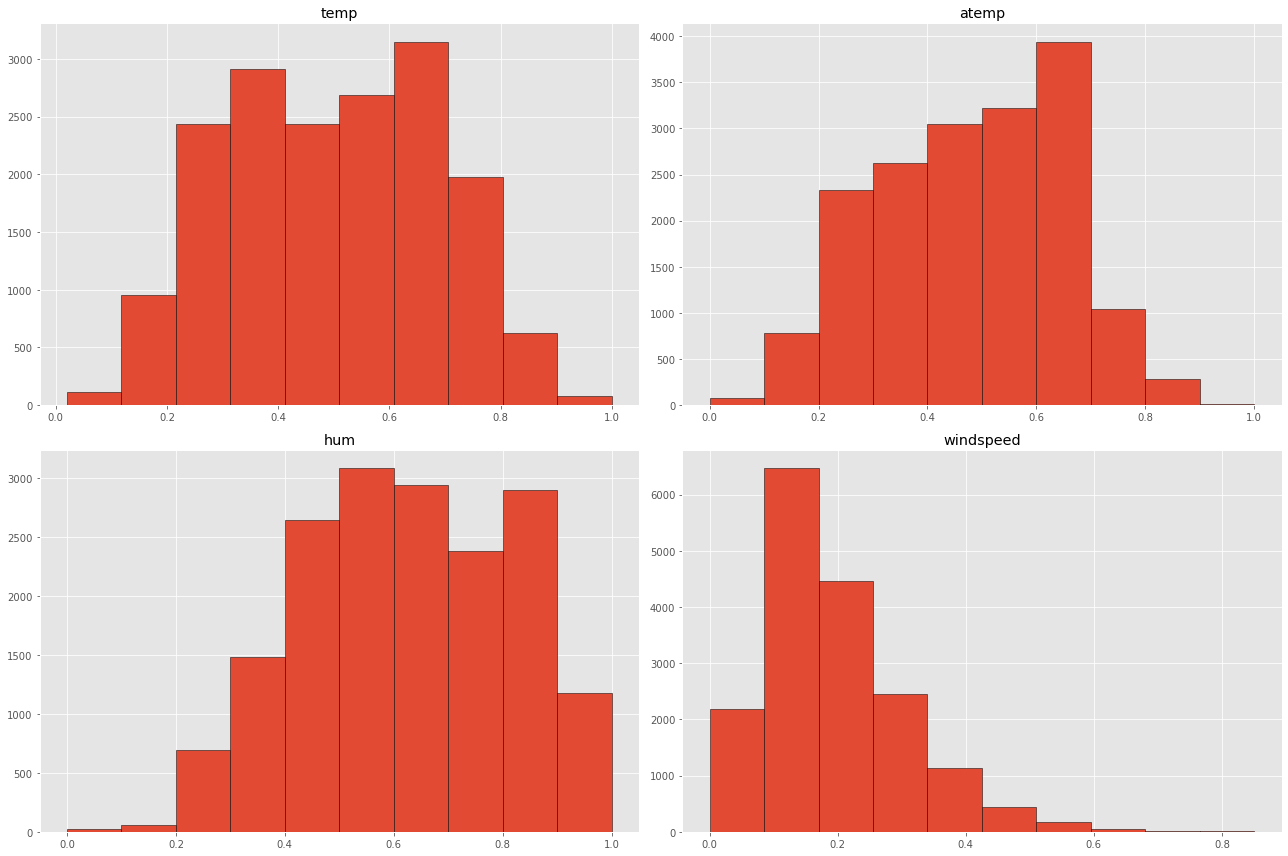

In [137]:
df.select_dtypes(include='float64').hist(edgecolor='k',figsize=(18,12))
plt.tight_layout();

<font color='brown'><b><I> From the plots, temp and atemp are normally distributed and humidity and windspeed look left and right-skewed. 

<font color='brown'><b><I>So using mean value to impute the missing values of temp and atemp and median value to impute the missing values of humidity and windspeed.

In [210]:
df[['temp','atemp']] = df[['temp','atemp']].fillna(df[['temp','atemp']].mean()) 

In [211]:
df[['hum','windspeed']] = df[['hum','windspeed']].fillna(df[['hum','windspeed']].median()) 

<font color='brown'><b><I>Impute missing values of categorical columns with mode

In [212]:
cols = ['season','workingday','weathersit','yr','mnth','holiday']
df[cols] = df[cols].fillna(df.mode().iloc[0])

#### <font color='orange'><b>Check for Outliers :

#### <font color='maroon'><b>Box plot :

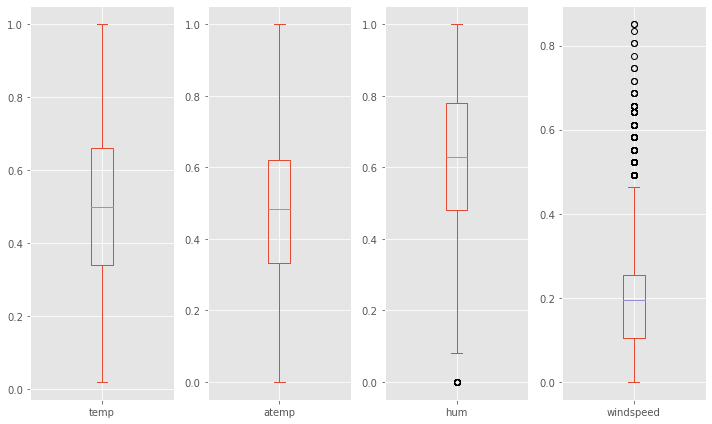

In [138]:
df.select_dtypes(include='float64').plot(kind='box',subplots=True,figsize=(10,6))
plt.tight_layout();

<font color='brown'><b><I> There is one outlier on the humidity column on the lower side and a few a outliers on the windspeed column on the higher side.

#### <font color='purple'><b>Bivariate analysis :

#### <font color='maroon'><b>Scatter plot :

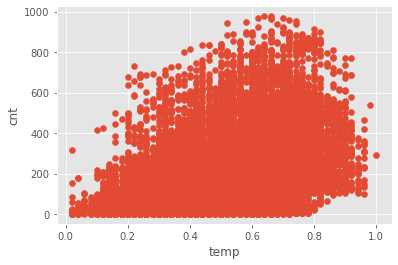

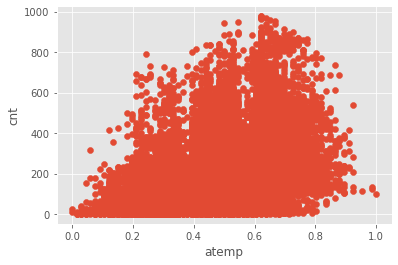

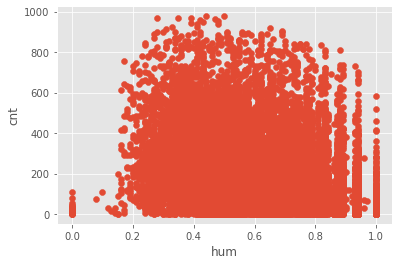

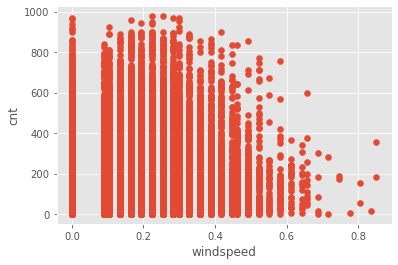

In [177]:
dependent_var = "cnt"
independent_vars = ['temp','atemp','hum','windspeed']


for var in independent_vars:
    plt.scatter(df[var],df[dependent_var])
    plt.xlabel(var)
    plt.ylabel(dependent_var)
    plt.show()

<font color='brown'><b><I>From the plots, count and windspeed and count and humidity have no linear relationship. cnt and temp and atemp have slightly linear relationship.

#### <font color='maroon'><b>Pairplot :

<Figure size 1440x1440 with 0 Axes>

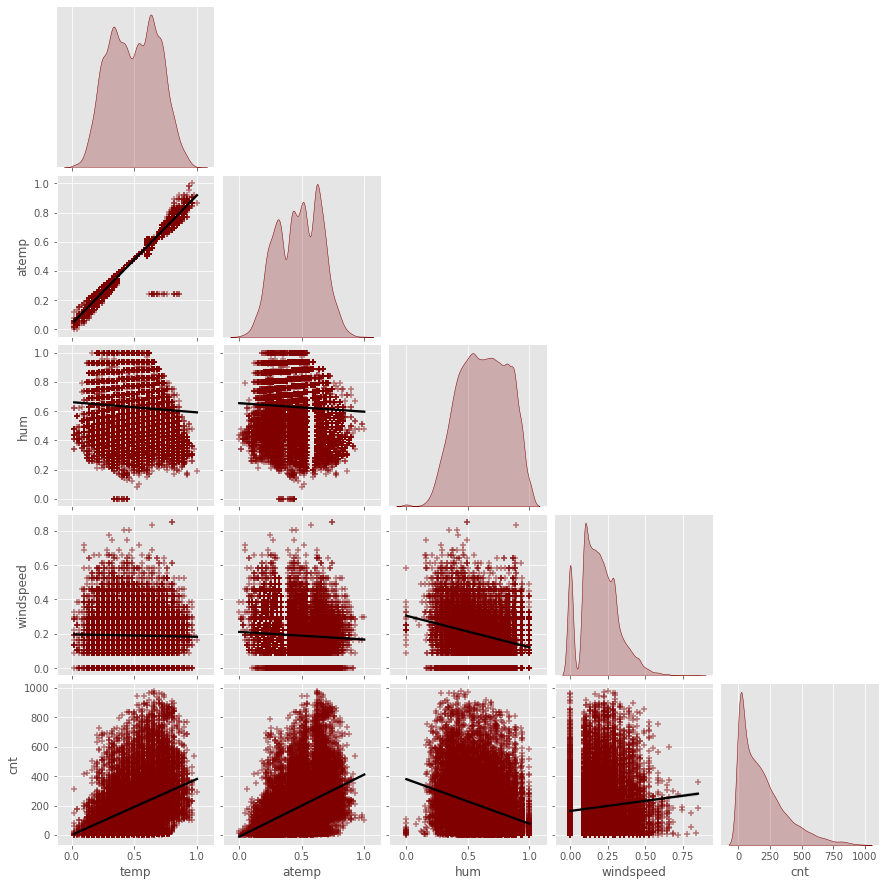

In [139]:
plt.figure(figsize=(20,20))
sns.pairplot(df.select_dtypes(include='float64').join(df['cnt']),markers="+",
                 kind='reg',
                 diag_kind="kde",
                 plot_kws={'line_kws':{'color':'black'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': 'maroon'}},
               corner=True,
                 diag_kws= {'color': 'maroon'})
plt.show()

#### <font color='maroon'><b>Heatmap :

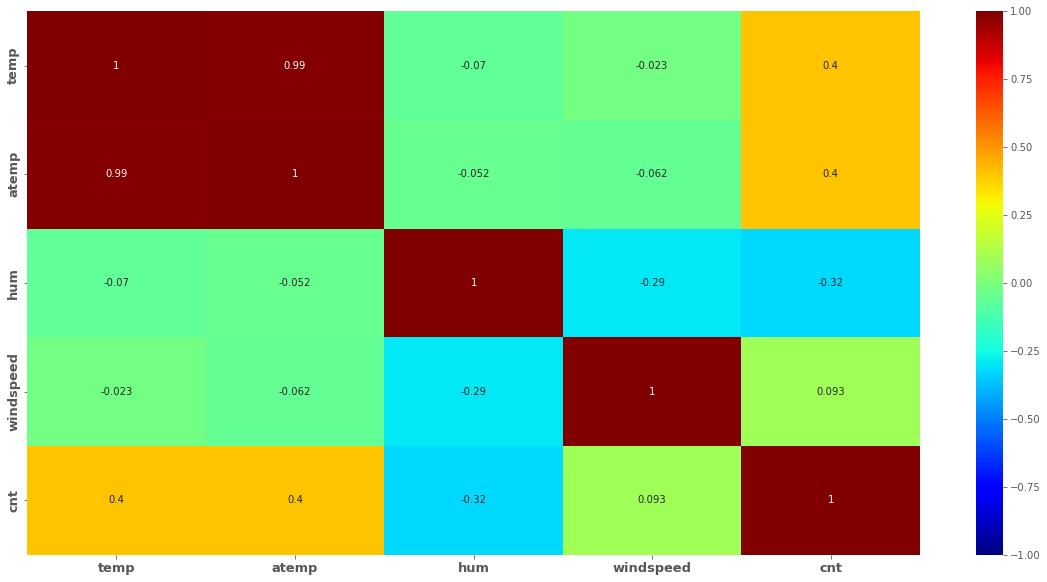

In [136]:
correlation = df.select_dtypes(include='float64').join(df['cnt']).corr()
plt.figure(figsize=(20,10))
ax=sns.heatmap(data=correlation,annot=True,vmax=1,vmin=-1,cmap='jet')
plt.xticks(fontsize=13,fontweight='bold')
plt.yticks(fontsize=13,fontweight='bold');

<font color='brown'><b><I>From the above plots, temp and atemp are strongly correlated to each other. And none of the independent variables are strongly correlated with the dependent variable count.

#### <font color='purple'>Check for Multicollinearity :
- <font color='peach'><b><I>You can detect high-multi-collinearity by inspecting the eigen values of correlation matrix. A very low eigen value shows that the data are collinear, and the corresponding eigen vector shows which variables are collinear.

- <font color='peach'><b><I>If there is no collinearity in the data, you would expect that none of the eigen values are close to zero

In [140]:
w, v = np.linalg.eig(correlation)
w

array([2.28513799, 0.01153075, 1.37540505, 0.76986036, 0.55806585])

<font color='peach'><b><I>The 2nd eigen value is close to zero. The corresponding eigen vector is :

In [141]:
v[:,1]

array([ 0.70593566, -0.70774748,  0.00566738, -0.02664602,  0.00249242])

<font color='peach'><b><I>In the eigen vectors we look for numbers not close to zero. Here the first and second vectors are not close to zero which corresponds to temp and atemp variables. Hence temp are atemp are collinear.

#### <font color='purple'><b>Visualizing categorical variables with the target variable :

#### <font color='maroon'><b>Bar plot :

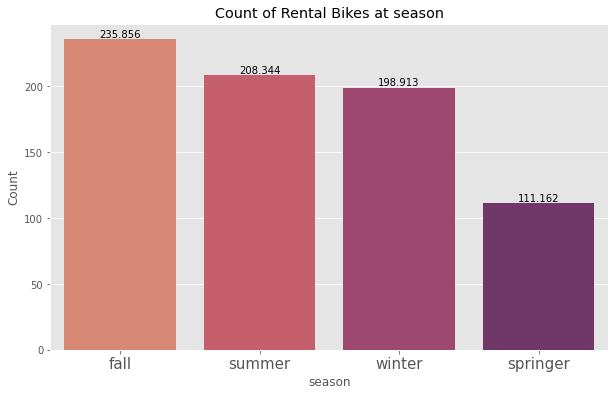

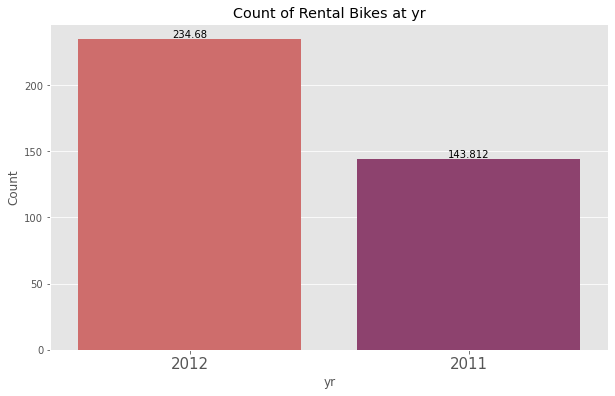

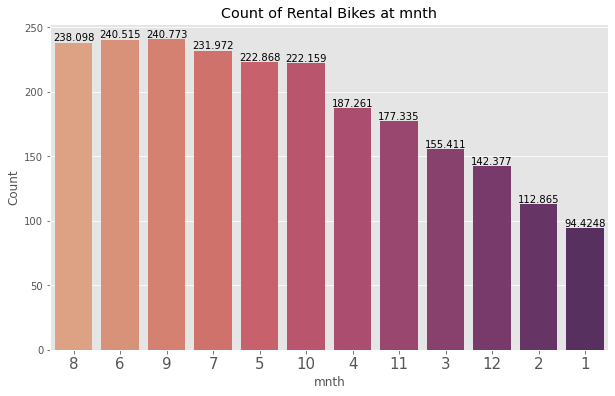

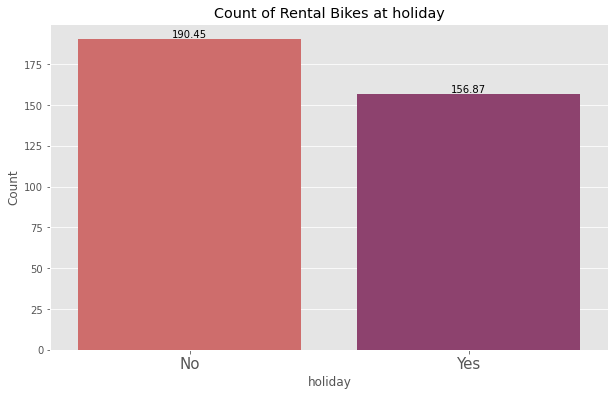

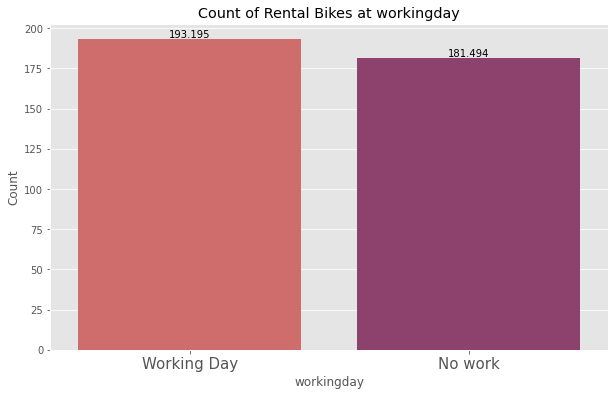

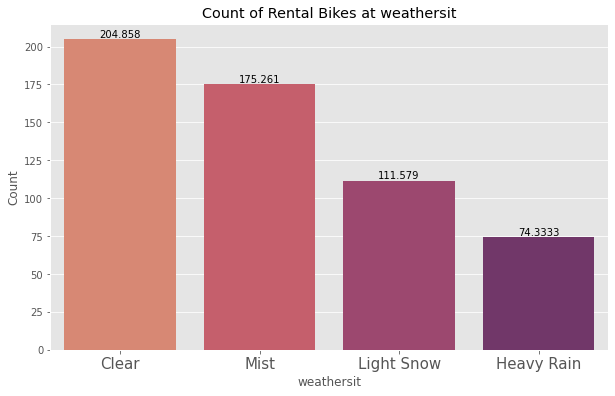

In [223]:
cols = ['season', 'yr', 'mnth', 'holiday', 'workingday', 'weathersit']
for col in cols:
    plt.figure(figsize=(10, 6))
    order=df.groupby([col])['cnt'].sum().sort_values(ascending=False).index
    ax = sns.barplot(x=col, y='cnt',data=df,palette='flare',ci=None,order=order)
    plt.xticks(fontsize=15)
    for i in ax.containers:
        ax.bar_label(i,)
    plt.title(f'Count of Rental Bikes at {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.show()

<font color='brown'><b><I>Count of rental bikes at different seasons, year, month, holiday, workingday and weather condition has been shown above.
    
<font color='brown'><b><I>  The bike rental count is highest during fall season, follwed by summer, winter and lowest at spring season.
    
<font color='brown'><b><I>    The year 2012 has higher count compared to 2011.
    
<font color='brown'><b><I>    Monthwise September month has highest count and January has the lowest.
    
<font color='brown'><b><I>   The rental count has been higher during working days compared to holidays.
     
<font color='brown'><b><I>    The rental count is higher when the weather is clear. Gradually decreases when there is mist and light snow. Lowest when there is heavy rain.

#### <font color='maroon'><b>Point plot :

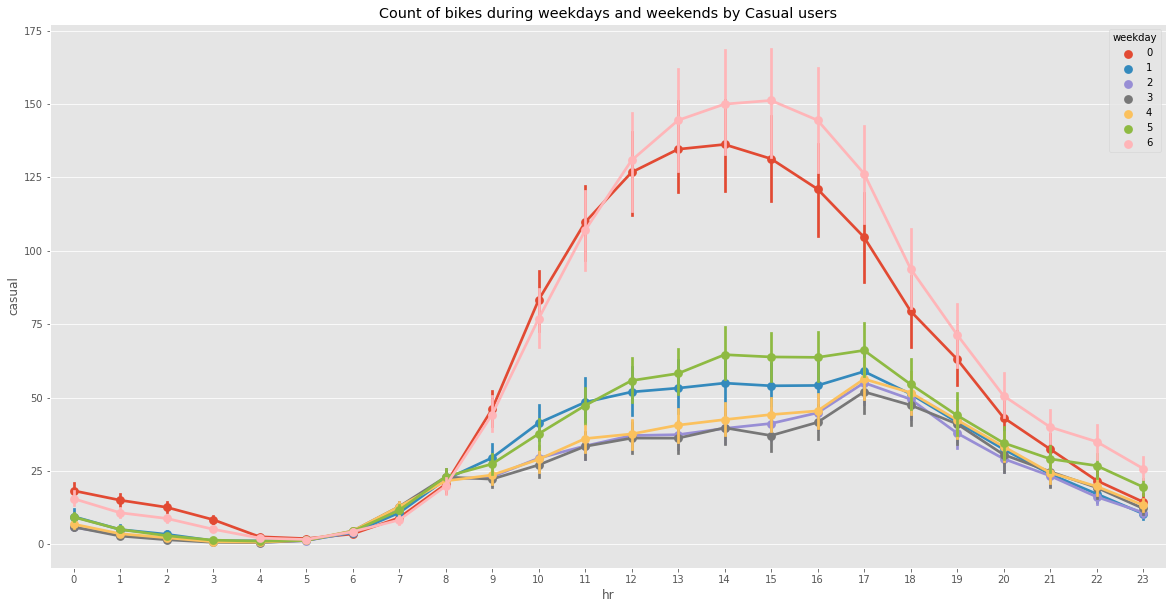

In [317]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hr',y='casual', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends by Casual users');

<font color='brown'><b><I>From the pink and red line on the graph which represent saturday and sunday there are huge number of casual users in the weekend mid day hours.

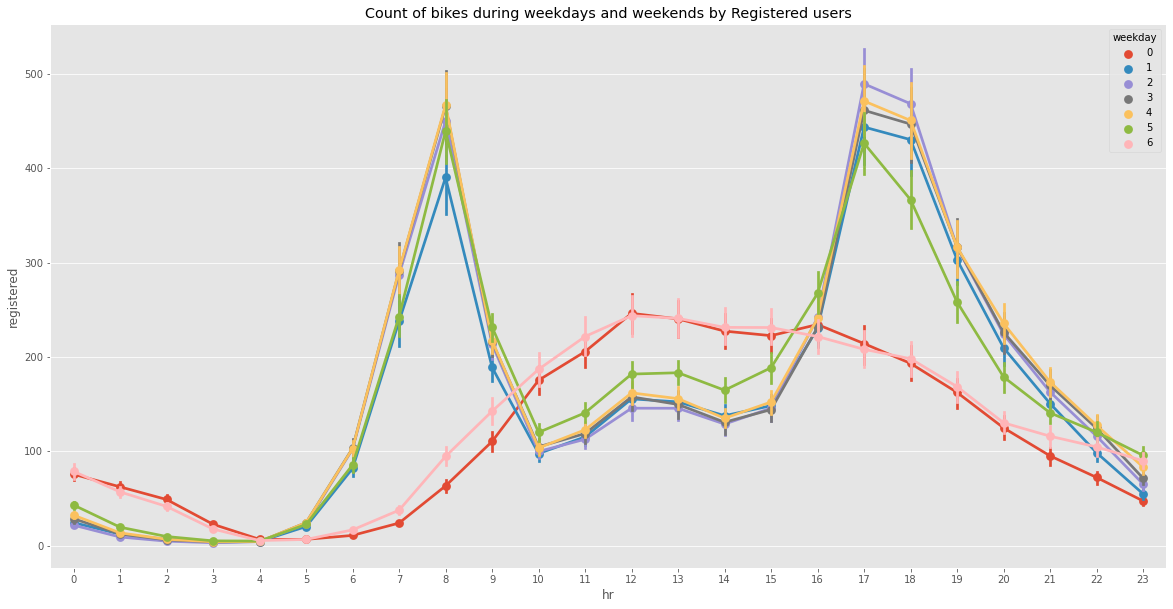

In [318]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hr',y='registered', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends by Registered users');

<font color='brown'><b><I>There are huge number of registered users in the morning and evening hours during weekdays.

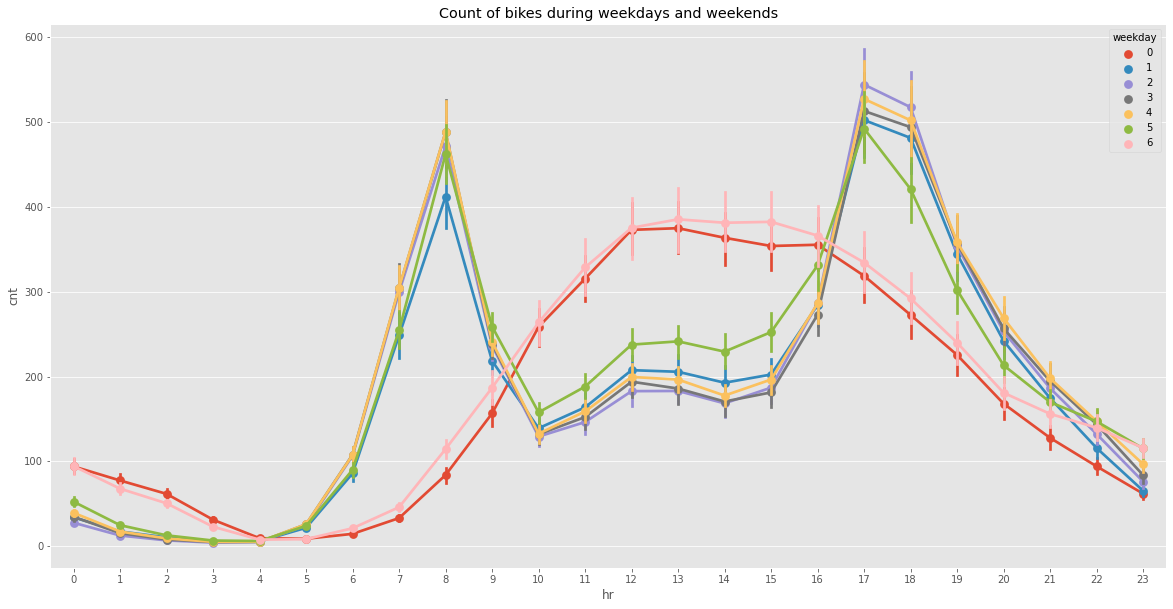

In [229]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hr',y='cnt', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends');

<font color='brown'><b><I>On weekdays, we observe a peak in the morning hours and in the evening.

<font color='brown'><b><I>On weekends, the peak value is in the afternoon.

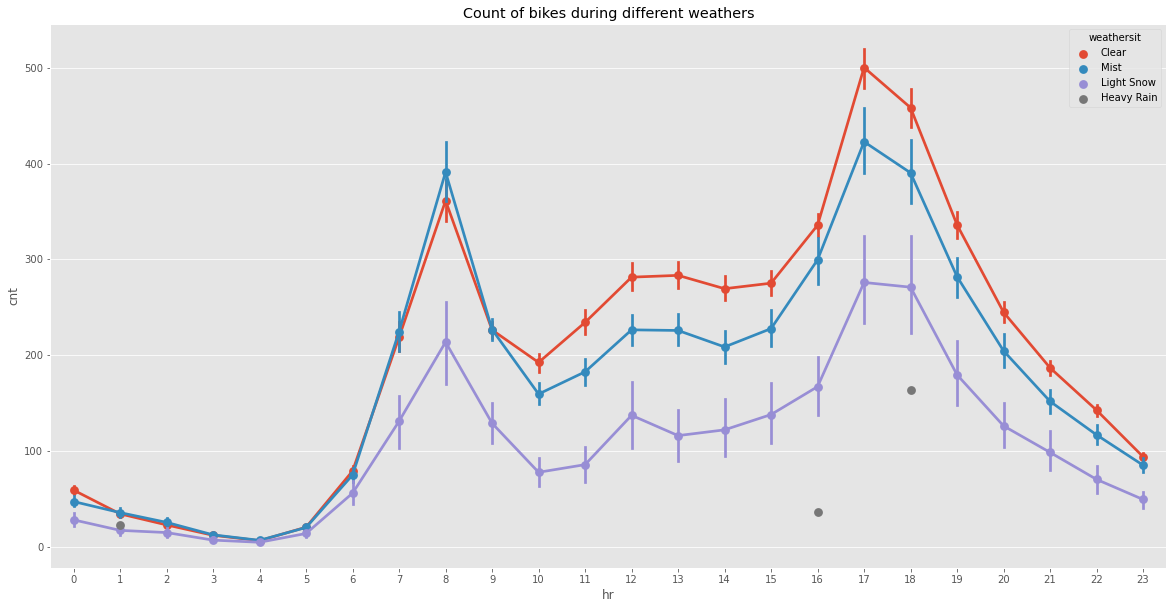

In [234]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hr', y='cnt', hue='weathersit', ax=ax)
ax.set(title='Count of bikes during different weathers');

<font color='brown'><b><I>The upper red line is the clear weather. The two dots are when weather is heavy rain, hence no bookings.

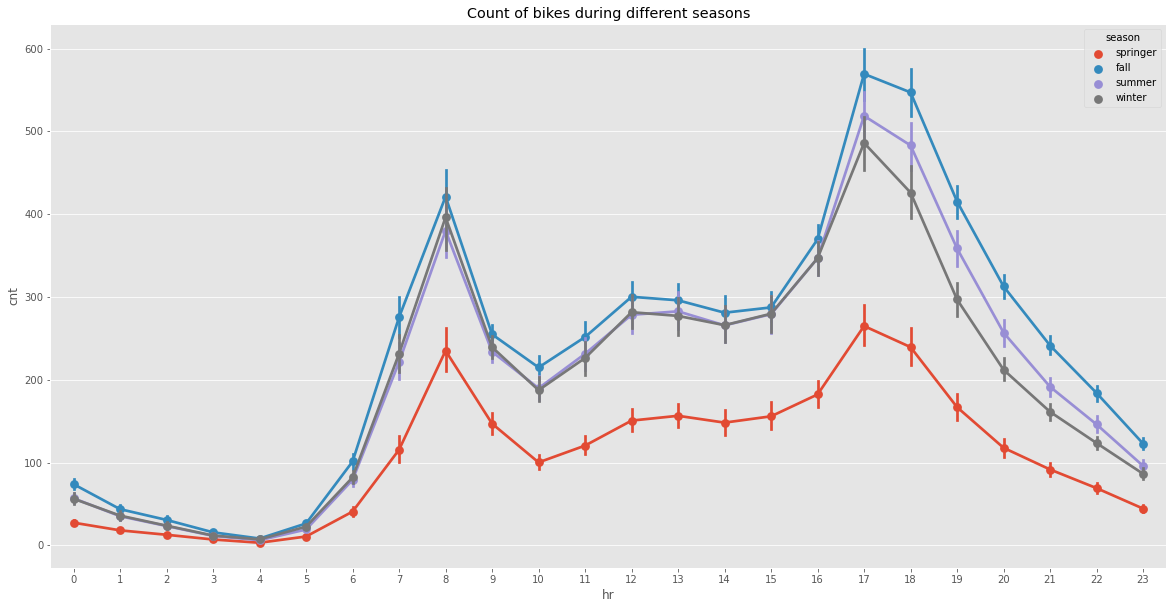

In [239]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hr', y='cnt', hue='season', ax=ax)
ax.set(title='Count of bikes during different seasons');

<font color='brown'><b><I>From the plot, among the seasons, fall has the highest bike rental count, summer is next to it followed by winter, spring has the lowest bike rental count.

### <font color='purple'><b>Feature Engineering :

In [252]:
df1 = df.copy()

#### <font color='orange'><b>Dropping the reduntant columns :

In [253]:
df1.drop(['casual','registered'],axis=1,inplace=True)
df1.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0.0,16
1,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.80,0.0,40
2,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,0.63,0.0,32
3,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0.0,13
4,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0.0,1


#### <font color='orange'><b>Dropping one of the Collinear column :

In [254]:
df1.drop(['atemp'],axis=1,inplace=True)

In [255]:
df1.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,springer,2011,1,0,No,6,No work,Clear,0.24,0.81,0.0,16
1,springer,2011,1,1,No,6,No work,Clear,0.22,0.80,0.0,40
2,springer,2011,1,2,No,6,No work,Clear,0.22,0.63,0.0,32
3,springer,2011,1,3,No,6,No work,Clear,0.24,0.75,0.0,13
4,springer,2011,1,4,No,6,No work,Clear,0.24,0.75,0.0,1


#### <font color='orange'><b>Split into Independent and Dependent variables :

In [256]:
x = df1.drop(['cnt'],axis=1)
y = df1['cnt']

#### <font color='orange'><b>Split into Train and Test data :

In [257]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [258]:
x_train.shape, x_test.shape

((13901, 11), (3476, 11))

#### <font color='maroon'><b>One-Hot Encoding the Categorical columns :

In [259]:
categorical_cols = ['season', 'yr', 'mnth','hr', 'holiday','weekday', 'workingday', 'weathersit']

In [260]:
ohe = OneHotEncoder(sparse=False)

In [261]:
x_train_enc = ohe.fit_transform(x_train[categorical_cols])
x_test_enc = ohe.transform(x_test[categorical_cols])

In [262]:
x_train_cat = pd.DataFrame(x_train_enc, columns=ohe.get_feature_names(categorical_cols))

In [263]:
x_train_cat.head()

,season_fall,season_springer,season_summer,season_winter,yr_2011,yr_2012,mnth_1,mnth_10,mnth_11,mnth_12,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_No work,workingday_Working Day,weathersit_Clear,weathersit_Heavy Rain,weathersit_Light Snow,weathersit_Mist
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [264]:
x_test_cat = pd.DataFrame(x_test_enc, columns=ohe.get_feature_names(categorical_cols))

#### <font color='maroon'><b>Standard Scale the Numerical columns :

In [265]:
numerical_cols = ['temp','hum','windspeed']

In [266]:
scaler = StandardScaler()

In [267]:
x_train_scl = scaler.fit_transform(x_train[numerical_cols])
x_test_scl = scaler.transform(x_test[numerical_cols])

In [268]:
x_train_num = pd.DataFrame(x_train_scl, columns=numerical_cols)
x_test_num = pd.DataFrame(x_test_scl, columns=numerical_cols)

<font color='orange'><b>Concatenate the categorical and numerical columns :

In [269]:
x_train1 = pd.concat([x_train_cat,x_train_num],axis=1)
x_train1.head()

,season_fall,season_springer,season_summer,season_winter,yr_2011,yr_2012,mnth_1,mnth_10,mnth_11,mnth_12,...,weekday_6,workingday_No work,workingday_Working Day,weathersit_Clear,weathersit_Heavy Rain,weathersit_Light Snow,weathersit_Mist,temp,hum,windspeed
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.218991,0.746512,-0.700300
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.531107,-0.342665,-0.456820
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.675533,-0.550128,0.518736
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.531107,1.317034,0.518736
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.739184,-0.653859,1.372551


In [270]:
x_test1 = pd.concat([x_test_cat,x_test_num],axis=1)
x_test1.head()

,season_fall,season_springer,season_summer,season_winter,yr_2011,yr_2012,mnth_1,mnth_10,mnth_11,mnth_12,...,weekday_6,workingday_No work,workingday_Working Day,weathersit_Clear,weathersit_Heavy Rain,weathersit_Light Snow,weathersit_Mist,temp,hum,windspeed
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.549668,-0.965052,0.518736
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.635146,0.331588,-0.456820
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.635146,0.798378,-0.700300
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.114952,1.628228,0.030958
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.531107,0.798378,0.030958


### <font color='magenta'><b>Feature Selection :

#### <font color='purple'><b><I>Selecting features with SelectKBest f_regression metric :

#### <font color='maroon'><b>Linear Regression with raw data :

In [434]:
model = LinearRegression()

In [435]:
model.fit(x_train1,y_train)

LinearRegression()

<font color='cyan'><b>R2 :

In [438]:
r2_lr = model.score(x_train1,y_train)
print('R2 of train set =',r2_lr)

R2 of train set = 0.6862284401378524


In [439]:
r2_lr_test = model.score(x_test1,y_test)
print('R2 of test set =',r2_lr_test)

R2 of test set = 0.681550325245385


<font color='cyan'><b>Adjusted R2 :

In [440]:
n = x_train1.shape[0]
p = x_train1.shape[1]
adj_r2_train = 1-((1-r2_lr)*(n-1)/(n-p-1))
print('Adjusted R2 of train set =',adj_r2_train)

Adjusted R2 of train set = 0.6848681588089703


In [441]:
n = x_test1.shape[0]
p = x_test1.shape[1]
adj_r2_test = 1-((1-r2_lr_test)*(n-1)/(n-p-1))
print('Adjusted R2 of test set =',adj_r2_test)

Adjusted R2 of test set = 0.675955308997866


<font color='maroon'><b><I> To find the best value of k :

In [190]:
k_values = range(1,x_train1.shape[1]+1)

In [191]:
cv_scores = []

In [442]:
for k in k_values:
    selector = SelectKBest(f_regression, k=k)
    x_selected = selector.fit_transform(x_train1,y_train)
    model_scores = cross_val_score(model,x_selected,y_train,cv=5)
    cv_scores.append(np.mean(model_scores))

In [443]:
best_k = k_values[np.argmax(cv_scores)]
print(f'The best value of k is : {best_k}')

The best value of k is : 52


<font color='orange'><b><I>Selecting features :

In [281]:
f_values, p_values = f_regression(x_train1,y_train,center=True)
print(p_values)

[1.96428396e-075 2.27771241e-186 1.42640073e-010 2.20873336e-004
 1.06444943e-190 1.06444943e-190 1.24572178e-078 1.17531148e-010
 1.15104310e-002 6.25490306e-021 3.79129028e-049 7.21521342e-009
 3.81383580e-001 1.39176746e-009 7.06001679e-021 2.41973264e-018
 2.63867761e-020 3.22345105e-031 4.44934050e-076 3.21825529e-104
 5.73276743e-112 1.99934374e-125 7.12143259e-135 6.92795425e-116
 4.38461970e-053 3.08259983e-003 3.17918694e-120 1.32238853e-004
 2.46989503e-002 3.24018419e-003 3.22712409e-019 1.43160927e-015
 1.83201098e-014 1.01092898e-014 2.22910868e-058 0.00000000e+000
 7.92738124e-218 2.15123151e-062 1.03259942e-007 6.72461178e-003
 9.49324293e-016 3.13160363e-046 1.80546418e-005 1.80546418e-005
 3.65907068e-003 2.86715052e-001 6.17077186e-001 6.11033573e-001
 1.35349347e-001 3.22769682e-001 6.35220586e-001 7.98582520e-004
 7.98582520e-004 4.12981883e-051 4.82313102e-001 1.09005289e-048
 1.60163680e-012 0.00000000e+000 0.00000000e+000 1.43849166e-029]


In [283]:
selected_features = x_train1.columns[p_values < 0.05]
print(selected_features)
print('No. of columns selected = ',len(selected_features))

Index(['season_fall', 'season_springer', 'season_summer', 'season_winter',
       'yr_2011', 'yr_2012', 'mnth_1', 'mnth_10', 'mnth_11', 'mnth_12',
       'mnth_2', 'mnth_3', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8',
       'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16',
       'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23',
       'holiday_No', 'holiday_Yes', 'weekday_0', 'workingday_No work',
       'workingday_Working Day', 'weathersit_Clear', 'weathersit_Light Snow',
       'weathersit_Mist', 'temp', 'hum', 'windspeed'],
      dtype='object')
No. of columns selected =  52


In [286]:
x_train_selected = x_train1[selected_features]
x_train_selected.head()

,season_fall,season_springer,season_summer,season_winter,yr_2011,yr_2012,mnth_1,mnth_10,mnth_11,mnth_12,...,holiday_Yes,weekday_0,workingday_No work,workingday_Working Day,weathersit_Clear,weathersit_Light Snow,weathersit_Mist,temp,hum,windspeed
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.218991,0.746512,-0.700300
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.531107,-0.342665,-0.456820
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.675533,-0.550128,0.518736
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.531107,1.317034,0.518736
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.739184,-0.653859,1.372551


In [287]:
x_test_selected = x_test1[selected_features]
x_test_selected

,season_fall,season_springer,season_summer,season_winter,yr_2011,yr_2012,mnth_1,mnth_10,mnth_11,mnth_12,...,holiday_Yes,weekday_0,workingday_No work,workingday_Working Day,weathersit_Clear,weathersit_Light Snow,weathersit_Mist,temp,hum,windspeed
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.549668,-0.965052,0.518736
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.635146,0.331588,-0.456820
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.635146,0.798378,-0.700300
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.114952,1.628228,0.030958
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.531107,0.798378,0.030958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3471,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.218991,-1.794902,2.469847
3472,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2.195727,-2.365423,0.763033
3473,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-0.717358,0.694647,-0.212522
3474,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.301203,1.628228,-1.554116


#### <font color='maroon'><b>Recursive Feature Elimination with cross validation :

In [477]:
cv = KFold(n_splits=10, shuffle=True, random_state=0)

In [478]:
rfe = RFECV(estimator=model,step=1,cv=cv,scoring='neg_mean_squared_error')

In [479]:
rfe.fit(x_train_selected,y_train)

RFECV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
      estimator=LinearRegression(), scoring='neg_mean_squared_error')

In [481]:
print('Selected Features :')
print(x_train_selected.columns[rfe.support_])
print(len(x_train_selected.columns[rfe.support_]))
print('Feature Ranking :')
print(rfe.ranking_)

Selected Features :
Index(['season_fall', 'season_springer', 'season_summer', 'season_winter',
       'yr_2011', 'yr_2012', 'mnth_1', 'mnth_10', 'mnth_11', 'mnth_12',
       'mnth_2', 'mnth_3', 'mnth_5', 'mnth_7', 'mnth_9', 'hr_0', 'hr_1',
       'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'holiday_No',
       'holiday_Yes', 'weekday_0', 'workingday_No work',
       'workingday_Working Day', 'weathersit_Clear', 'weathersit_Light Snow',
       'weathersit_Mist', 'temp', 'hum', 'windspeed'],
      dtype='object')
50
Feature Ranking :
[1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [487]:
x_train_selected2 = pd.DataFrame(rfe.transform(x_train_selected),columns=x_train_selected.columns[rfe.support_])
x_train_selected2.head()

,season_fall,season_springer,season_summer,season_winter,yr_2011,yr_2012,mnth_1,mnth_10,mnth_11,mnth_12,...,holiday_Yes,weekday_0,workingday_No work,workingday_Working Day,weathersit_Clear,weathersit_Light Snow,weathersit_Mist,temp,hum,windspeed
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.218991,0.746512,-0.700300
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.531107,-0.342665,-0.456820
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.675533,-0.550128,0.518736
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.531107,1.317034,0.518736
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.739184,-0.653859,1.372551


In [488]:
x_test_selected2 = pd.DataFrame(rfe.transform(x_test_selected),columns=x_test_selected.columns[rfe.support_])
x_test_selected2.head()

,season_fall,season_springer,season_summer,season_winter,yr_2011,yr_2012,mnth_1,mnth_10,mnth_11,mnth_12,...,holiday_Yes,weekday_0,workingday_No work,workingday_Working Day,weathersit_Clear,weathersit_Light Snow,weathersit_Mist,temp,hum,windspeed
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.549668,-0.965052,0.518736
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.635146,0.331588,-0.456820
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.635146,0.798378,-0.700300
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.114952,1.628228,0.030958
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.531107,0.798378,0.030958


### <font color='magenta'><b>Model building :

#### <font color='green'><b>Linear Regression with Selected features :

In [492]:
lr = LinearRegression()

In [493]:
lr.fit(x_train_selected2,y_train)

LinearRegression()

<font color='cyan'><b>R2 :

In [494]:
r2_lrs_train = lr.score(x_train_selected2,y_train)
print('R2 of train set =',r2_lrs_train)

R2 of train set = 0.686110106700828


In [497]:
r2_lrs_test = lr.score(x_test_selected2,y_test)
print('R2 of test set =',r2_lrs_test)

R2 of test set = 0.6818753483735274


<font color='cyan'><b>Adjusted R2 :

In [498]:
n = x_train_selected.shape[0]
p = x_train_selected.shape[1]
adj_r2_train_lr = 1-((1-r2_lrs_train)*(n-1)/(n-p-1))
print('Adjusted R2 of train set =',adj_r2_train_lr)

Adjusted R2 of train set = 0.6849314329247189


In [499]:
n = x_test_selected.shape[0]
p = x_test_selected.shape[1]
adj_r2_test_lr = 1-((1-r2_lrs_test)*(n-1)/(n-p-1))
print('Adjusted R2 of test set =',adj_r2_test_lr)

Adjusted R2 of test set = 0.677042604615252


#### <font color='magenta'><b>Residual Analysis : 

#### <font color='purple'><b>Check for Normality of Residuals :

In [451]:
residuals_train = y_train - y_pred_train

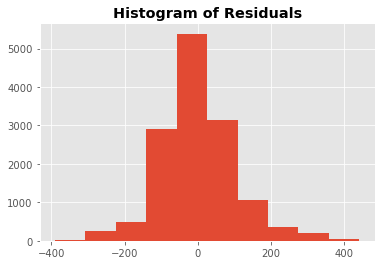

In [453]:
residuals_train.hist()
plt.title('Histogram of Residuals',fontweight='bold');

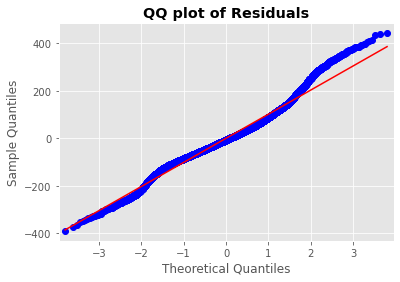

In [358]:
sm.qqplot(residuals_train, line='s')
plt.title('QQ plot of Residuals',fontweight='bold');

<font color='purple'><b><I>Statistical test to check for normality :

In [345]:
_,p_value = shapiro(residuals_train)
if p_value < 0.05:
    print(f"Residuals are normally distributed, p_value = {p_value}")
else:
    print(f"Residuals are not normally distributed, p_value = {p_value}")

Residuals are normally distributed, p_value = 1.5414283107572988e-44


#### <font color='purple'><b>Check for Homoscedasticity :

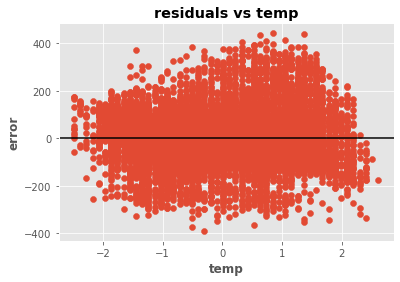

In [355]:
plt.scatter(x_train1['temp'],residuals_train)
plt.axhline(y=0,color='black')
plt.xlabel('temp',fontweight='bold')
plt.ylabel('error',fontweight='bold')
plt.title('residuals vs temp',fontweight='bold');

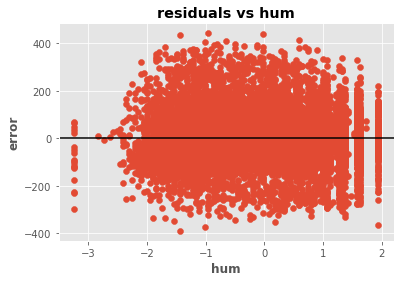

In [356]:
plt.scatter(x_train1['hum'],residuals_train)
plt.axhline(y=0,color='black')
plt.xlabel('hum',fontweight='bold')
plt.ylabel('error',fontweight='bold')
plt.title('residuals vs hum',fontweight='bold');

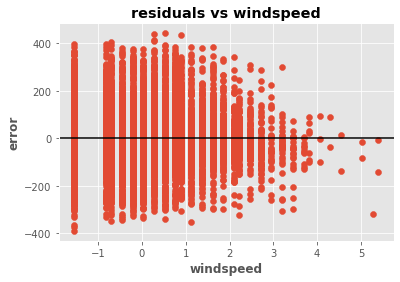

In [357]:
plt.scatter(x_train1['windspeed'],residuals_train)
plt.axhline(y=0,color='black')
plt.xlabel('windspeed',fontweight='bold')
plt.ylabel('error',fontweight='bold')
plt.title('residuals vs windspeed',fontweight='bold');

<font color='brown'><b><I>There is no particular pattern. The error values are randomly distributed. Hence homoscedastic.

#### <font color='green'><b>Lasso Regression with Cross Validation (L1 Regularization) :

In [393]:
from sklearn.linear_model import LassoCV

In [392]:
alphas = np.logspace(-4,0,100)

In [394]:
lasso_cv = LassoCV(alphas=alphas, cv=5)

In [395]:
lasso_cv.fit(x_train_selected,y_train)

LassoCV(alphas=array([1.00000000e-04, 1.09749877e-04, 1.20450354e-04, 1.32194115e-04,
       1.45082878e-04, 1.59228279e-04, 1.74752840e-04, 1.91791026e-04,
       2.10490414e-04, 2.31012970e-04, 2.53536449e-04, 2.78255940e-04,
       3.05385551e-04, 3.35160265e-04, 3.67837977e-04, 4.03701726e-04,
       4.43062146e-04, 4.86260158e-04, 5.33669923e-04, 5.85702082e-04,
       6.42807312e-04, 7.05480231e-0...
       1.17681195e-01, 1.29154967e-01, 1.41747416e-01, 1.55567614e-01,
       1.70735265e-01, 1.87381742e-01, 2.05651231e-01, 2.25701972e-01,
       2.47707636e-01, 2.71858824e-01, 2.98364724e-01, 3.27454916e-01,
       3.59381366e-01, 3.94420606e-01, 4.32876128e-01, 4.75081016e-01,
       5.21400829e-01, 5.72236766e-01, 6.28029144e-01, 6.89261210e-01,
       7.56463328e-01, 8.30217568e-01, 9.11162756e-01, 1.00000000e+00]),
        cv=5)

In [455]:
print('The best value of alpha from cross validation =',lasso_cv.alpha_)

The best value of alpha from cross validation = 0.001484968262254465


<font color='cyan'><b>R2 :

In [457]:
r2_train_ls = lasso_cv.score(x_train_selected,y_train)
print('R2 of train set =',r2_train_ls)

R2 of train set = 0.6860967273614704


In [458]:
r2_test_ls = lasso_cv.score(x_test_selected,y_test)
print('R2 of test set =',r2_test_ls)

R2 of test set = 0.6819869526665953


<font color='cyan'><b>Adjusted R2 :

In [460]:
adj_r2_train_ls = 1-((1-r2_train_ls)*(n-1)/(n-p-1))
print('Adjusted R2 of train set =',adj_r2_train_ls)

Adjusted R2 of train set = 0.681328112059921


In [461]:
adj_r2_test_ls = 1-((1-r2_test_ls)*(n-1)/(n-p-1))
print('Adjusted R2 of train set =',adj_r2_test_ls)

Adjusted R2 of train set = 0.6771559043284892


#### <font color='green'><b>Robust Regression - Huber-White Regression :

In [462]:
X = sm.add_constant(x_train_selected)

In [421]:
model_h = sm.RLM(y_train.values.ravel(),X,M=sm.robust.norms.HuberT(),cov_type='HC3').fit()

In [422]:
print(model_h.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                13901
Model:                            RLM   Df Residuals:                    13853
Method:                          IRLS   Df Model:                           47
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 22 Apr 2023                                         
Time:                        23:57:40                                         
No. Iterations:                    50                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     18

<font color='cyan'><b>R2 :

In [463]:
# Residual sum of squares
RSS = ((model_h.resid)**2).sum()
# Total sum of squares
TSS = ((y_train-y_train.mean())**2).sum()
pseudo_r_squared = 1-(RSS/TSS)
print('Pseudo R2 value =',pseudo_r_squared)

Pseudo R2 value = 0.6775392831659939


Decision Tree Regressor :

In [428]:
from sklearn.tree import DecisionTreeRegressor

In [471]:
dt_regressor = DecisionTreeRegressor(max_depth=5)

In [472]:
dt_regressor.fit(x_train_selected,y_train)

DecisionTreeRegressor(max_depth=5)

In [473]:
y_pred_dt = dt_regressor.predict(x_train_selected)

In [474]:
r2_dt = r2_score(y_train,y_pred_dt)
r2_dt

0.5322293629945279